In [3]:
import thinkstats2
import thinkstats2 as tk2
hist = tk2.Hist([1,2,3,3,5])


In [2]:
hist.Values()
for val, freq in hist.Items():
    print(val, hist.Freq(val))
    

1 1
2 1
3 2
5 1


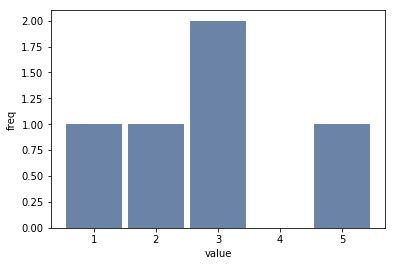

Hist({1: 1, 2: 1, 3: 2, 5: 1})

<Figure size 576x432 with 0 Axes>

In [3]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='freq')
hist


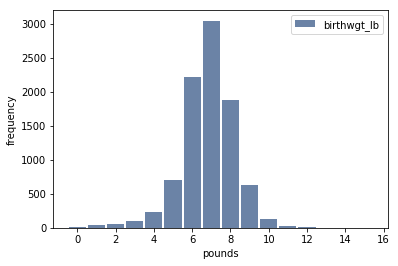

<Figure size 576x432 with 0 Axes>

In [4]:
import nsfg as nf
preg = nf.ReadFemPreg()
live = preg[preg.outcome == 1]
hist = tk2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


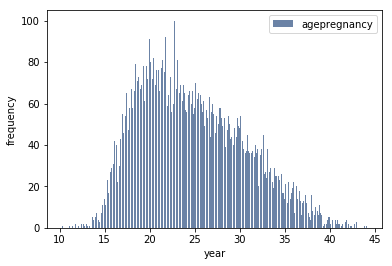

0    22.75
dtype: float64

<Figure size 576x432 with 0 Axes>

In [5]:
ageprg = preg.agepreg
hist = tk2.Hist(ageprg, label='agepregnancy')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='year', ylabel='frequency')

preg.agepreg.mode()

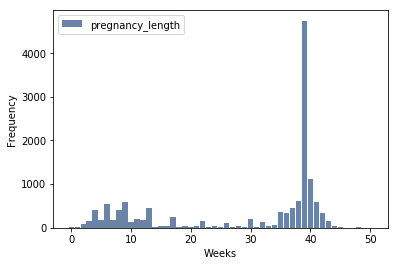

<Figure size 576x432 with 0 Axes>

In [6]:
prglnt = preg.prglngth
hist = tk2.Hist(prglnt, label='pregnancy_length')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Weeks', ylabel='Frequency')

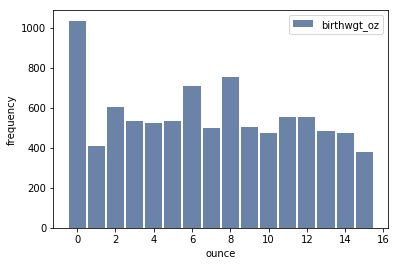

<Figure size 576x432 with 0 Axes>

In [7]:
birth_oz = preg.birthwgt_oz
hist = tk2.Hist(birth_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='ounce', ylabel='frequency')

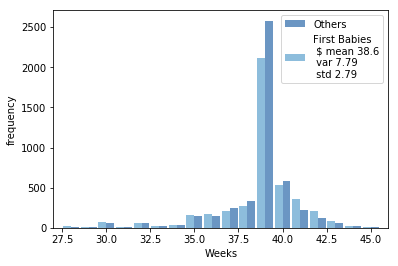

<Figure size 576x432 with 0 Axes>

In [8]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = tk2.Hist(firsts.prglngth)
other_hist = tk2.Hist(others.prglngth)
width = 0.45
thinkplot.PrePlot(2)
a = firsts.prglngth.mean()
b = firsts.prglngth.var()
c = firsts.prglngth.std()
thinkplot.Hist(other_hist, align='left', width=width, label='Others')
thinkplot.Hist(first_hist, align='right', width=width, label=f'First Babies\n $ mean {round(a, 2)}\n var {round(b, 2)}  \n std {round(c, 2)} ')
thinkplot.Show(xlabel='Weeks', ylabel='frequency', xlim=[27, 46])


In [9]:
firsts.prglngth.mode()

0    39
dtype: int64

In [10]:
(7%0.078) *24

1.3920000000000003

In [11]:
38.601 - 38.523

0.07799999999999585

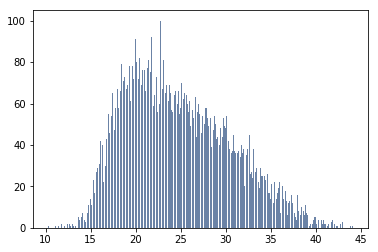

In [12]:
f = tk2.Hist(preg.agepreg)
thinkplot.Hist(f)

first babies wgt is 7.201094 
other babies wgt is 7.325856

their difference in wgt is ↙↙↙↙


(38.02414810839817, 40.798449612403104)

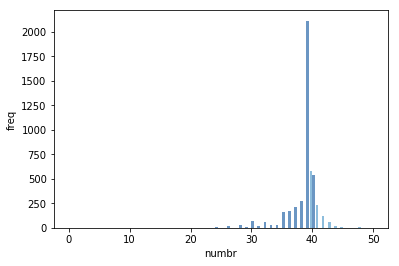

In [13]:

from coheneffect import CohenEffectSize as cohen
first = preg[preg.birthord == 1]
other = preg[preg.birthord != 1]
f_babies = first.totalwgt_lb
o_babies = other.totalwgt_lb
print(f'first babies wgt is {f_babies.mean():2f}', f'\nother babies wgt is {o_babies.mean():2f}')

# To compute the difference
print('\ntheir difference in wgt is ↙↙↙↙')
cohen(f_babies, o_babies)

########################
########################


# Do first babies come early?
first_come = preg[preg.prglngth <= 40]
late_come = preg[preg.prglngth >= 40]
get_first = first_come[first_come.birthord == 1]
get_other = late_come[late_come.birthord != 1]
#### plot
fhist = tk2.Hist(get_first.prglngth)
ohist = tk2.Hist(get_other.prglngth)
thinkplot.PrePlot(2)
thinkplot.Hist(fhist, align='left', width=0.45)
thinkplot.Hist(ohist, align='right', width=0.45)
thinkplot.Config(xlabel='numbr', ylabel='freq')
#### get the mean 
(get_first.prglngth.mean(), get_other.prglngth.mean())


In [14]:
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n


In [15]:
import thinkstats2 as tk2
pmf = tk2.Pmf([1,2,2,3,5])
pmf.Incr(2, 0.2)
pmf.Mult(2, 0.5)
pmf.Mult(5, 2)
# modify a pmf and you'll lose normality
pmf.Total()
# to renormalize
pmf.Normalize()
pmf.Total()

1.0

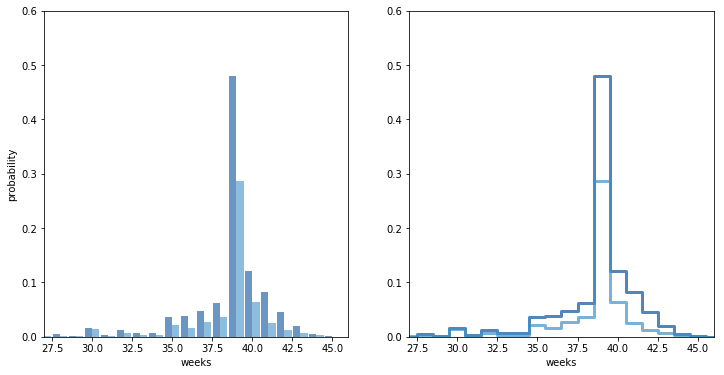

<Figure size 576x432 with 0 Axes>

In [16]:
first_pmf = preg[preg.birthord == 1]
other_pmf = preg[preg.birthord != 1]
fpmf = first_pmf.prglngth 
opmf = other_pmf.prglngth

fhist = tk2.Pmf(fpmf)
ohist = tk2.Pmf(opmf)

thinkplot.PrePlot(2, rows=1,cols=2)
thinkplot.Hist(fhist, align='right', width=0.45)
thinkplot.Hist(ohist, align='left', width=0.45)
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([fhist, ohist])
thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])

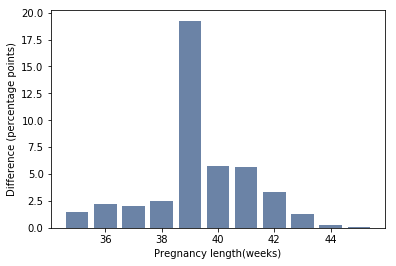

In [17]:
# Bringing out place with most effect which is btw 35 and 46
weeks = range(35, 46)
diff = []
for week in weeks:
    p1 = fhist.Prob(week)
    p2 = ohist.Prob(week)
    diffs = 100 * (p1 - p2)
    diff.append(diffs)
#     print(diffs, week,'\n',end='\t')
thinkplot.Bar(weeks, diff)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')

mean 23.692307692307693


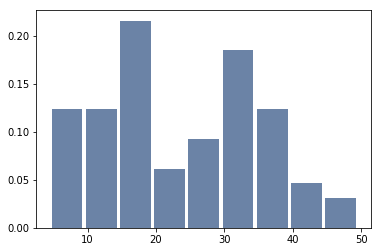

In [18]:
d = { 7: 8, 12: 8, 17: 14, 22: 4,27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
a = tk2.Pmf(d)
pmf = tk2.Pmf(d, label='actual')
thinkplot.Hist(pmf)
print('mean', pmf.Mean())

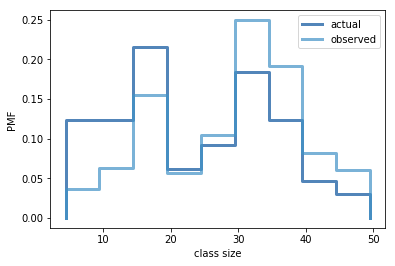

<Figure size 576x432 with 0 Axes>

In [19]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x , p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

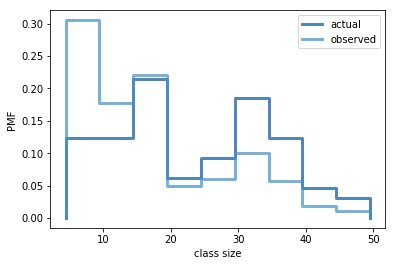

<Figure size 576x432 with 0 Axes>

In [20]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf
biased_pmf = UnbiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

## DataFrame indexing

In [21]:
import numpy as np
import pandas as pd
array = np.random.randn(4, 2)
columns = ['A', 'B']
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
indeces =['a', 'b']
df.loc['a':'c':2]

,A,B
a,0.490173,-0.594044
c,-0.780645,-1.998606


In [22]:
import thinkstats2 as tk2
pmf = tk2.Pmf([1,2,2,3,5])
pmf[2] == 2/5

True